### Lab 4 -- To what extent did CO2 concentrations control Phanerozoic climate?

In [1]:
1370*1.05

1438.5

Names: Carson and Cam

#### Warmup problem:

When squirrels get together for a party, they like to have cigars. A squirrel party is successful when the number of cigars is between 40 and 60, inclusive. Unless it is the weekend, in which case there is no upper bound on the number of cigars. Return True if the party with the given values is successful, or False otherwise.

In [2]:
def cigar_party(cigars, is_weekend):
    return (40 <= cigars <= 60) or (is_weekend and cigars >= 40)

In [3]:
print(cigar_party(30, False)) # should return False
print(cigar_party(50, False)) # should return True
print(cigar_party(70, True)) # should return True

False
True
True


#### Notes from last lab

- 'Restart Kernel and Run All' before submitting lab -- make sure it all works!
- Use your model to answer questions!!

#### Clean up functions from previous labs

Let's take some time to make sure the functions we've made in previous labs are working correctly, are well documented, and have thoughtful variable names. We can also add some documentation to our function to make it clear what the function does and how to use it. We can use something called 'docstrings' to do this: see the example below for the `calc_S` function.

In [4]:
def calc_S(age):
    
    ''' Calculates the solar flux (S) at Earth at any point in Earth's history.
            
            INPUT: age, in years. Input of 1e6 will find S for 1 million years ago. Must be < 4.57e9.
            OUTPUT: Solar flux reaching Earth in W/m^2. '''
            
    return ((1/(1+(2/5)*(1-((4.57e9-age)/4.57e9))))) * 1370

print(calc_S(0)) # should be 1370 W/m2

1370.0


Add documentation and a test for the `calc_A` and `calc_T_equil` functions. 

In [5]:
import numpy as np

A_i= 0.7  # Full ice coverage
A_0= 0.289  # Lowest realistic albedo (No ice)

T_i= 260  # Transition to Snowball Earth
T_0= 293  # Transition to ice-free Earth

sig = 5.67e-8  # W/m^2/K^4 Stefan-Boltzmann constant 

def calc_A(T):
    
    '''
    Calculates albedo at a given temperature using the piecewise expression given in lab. Note that the endpoint
    temperatures and albedos are defined outside the function.
    
        INPUT: temperature T in Kelvin
        OUTPUT: Albedo in interval [0,1]
    '''
    
    if T<=T_i:
        return A_i
    elif T>=T_0:
        return A_0
    else:
        return A_0 + (A_i - A_0) * ((T-T_0)**2/(T_i-T_0)**2)

print(calc_A(255))  # Should be 0.7
print(calc_A(273))  # Should be [equal to some as-yet-unknown intermediate value]
print(calc_A(300))  # Should be 0.289


def calc_T_equil(S, R, A, Gh_eff):
    
    '''
    Calculates equilibrium temperature given solar flux, radiative forcing, albedo, and greenhouse effect.
    
        INPUT: Solar flux (W/m^2), Radiative forcing (W/m^2), albedo (in interval [0,1]), and greenhouse effect (deg C, >= 0)
        OUTPUT: Equilibrium temperature in Celsius taking into account unreflected solar shortwave radiation
            and longwave radiation from radiative forcing.
    
    '''
    
    shortwave_comp = (S/4)*(1-A)  # W/m^2; shortwave flux not reflected
    longwave_comp = R  # W/m^2; radiative forcing, flux from longwave trapped by increased eps
    return np.power((shortwave_comp + longwave_comp)/sig, (1/4)) + Gh_eff - 273  # C; Stefan-Boltzmann
    
    
print(calc_T_equil(1370, 2.58, 0.3, 32))  # Should be [equal to some as-yet-unknown known value]

print(calc_T_equil.__doc__)

0.7
0.43996418732782366
0.289
14.685459434400627

    Calculates equilibrium temperature given solar flux, radiative forcing, albedo, and greenhouse effect.
    
        INPUT: Solar flux (W/m^2), Radiative forcing (W/m^2), albedo (in interval [0,1]), and greenhouse effect (deg C, >= 0)
        OUTPUT: Equilibrium temperature in Celsius taking into account unreflected solar shortwave radiation
            and longwave radiation from radiative forcing.
    
    


### Plotting data from files using `pandas`

Today we will be using two new packages. `pandas` is used to read in data from files such as .xlsx, .csv, and .txt. It is typically imported `as pd`. 

We will also be using a package called `seaborn` which we will import `as sns`. Today, we'll just use `seaborn` for it's colorblind-friendly color palette. 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

sns.set_palette('colorblind') # set the palette used for plots to colorblind-friendly

#### Read in data

We will be getting data from Excel files today so we will use the `read_excel` function from `pandas`. This will create a `DataFrame` -- similar to having a rows-and-columns style data structure you may be familiar with from working with Excel.

In [7]:

df_song = pd.read_excel("Song_2019_SST_C.xlsx") # get data from Song et al. (2019)
df_scot = pd.read_excel("Scotese_2021_T.xlsx") # get data from Scotese (2021)
df_gross = pd.read_excel("grossman_2022_locfit_T_5Ma.xlsx") # get data from Grossman et al. (2022)



All of these data use the isotope ratios of ancient sediments as a proxy for ocean temperature. The Grossman data are from shallow, tropical seas. The Scotese data are global averages. 

#### Take a look at the data...

Units aren't listed -- what units do we think Age, Temperature, and CO2 are in?

We would expect that given the orders of magnitude of the data, age would be in millions of years ago, temperature would be in Celsius, and CO_2 would be in ppm.

In [8]:
display(df_song)

,Age,Temperature,CO2
0,500,46.59,4047
1,490,48.65,3513
2,480,40.83,3171
3,470,35.14,2837
4,460,32.14,2435
5,450,27.94,2536
6,440,28.25,2600
7,430,28.38,1957
8,420,30.68,2550
9,410,30.85,2612


We can access columns like this:

In [9]:
display(df_song.Age)

0     500
1     490
2     480
3     470
4     460
5     450
6     440
7     430
8     420
9     410
10    400
11    390
12    380
13    370
14    360
15    350
16    340
17    330
18    320
19    310
20    300
21    290
22    280
23    270
24    260
25    250
26    240
27    230
28    220
29    210
30    200
31    190
32    180
33    170
34    160
35    150
36    140
37    130
38    120
39    110
40    100
41     90
42     80
43     70
44     60
45     50
46     40
47     30
48     20
49     10
50      0
Name: Age, dtype: int64

And we can access elements of each columns like this:

In [10]:
display(df_song.Age.iloc[5]) # indexing (with slightly different syntax than before)
display(df_song.CO2.iloc[5])

450

2536

#### Using CO$_2$ data to force our model

We will use the Phanerozoic CO$_2$ reconstruction from Song et al. (2019) to give us CO$_2$ values over the Phanerozoic. We will run these values through our climate model to see how equilibrium temperature responds to perturbations in CO$_2$.

First, we need to establish a relationship between CO$_2$ concentration and radiative forcing. We can use this equation from the IPCC:

![IPCC CO2 RF](IPCC_CO2_RF.png)

Where C$_0$ is pre-industrial CO$_2$ concentration and C is CO$_2$ concentration for the time of interest.

In [11]:
def calc_R(co2, co2_0):
    
    '''
    Return radiative forcing in W/m^2 given atmospheric CO_2 at some time, 
    and CO_2_0 (preindustrial atmospheric CO_2 concentration)
    
        INPUT: 
            co2: atmospheric CO_2 concentration at time of interest
            co2_0: preindustrial atmospheric CO_2 concentration (commonly taken to be 280ppm)
            
        OUTPUT:
            Radiative forcing in W/m^2
    '''
    
    a = 5.35  # seems to be in W/m^2, as the ln(C/C0) will be unitless. Value from IPCC table
    return a * np.log(co2/co2_0)
    
print(calc_R(400, 280))
print(calc_R(800, 280))

1.9082109500722182
5.616548366067925


Now, let's use the model we've created so far to calculate equilibrium T for each CO2 level given by the Song et al. (2019) dataset. You will need to:
1. Iterate through each element of the Song dataset (`df_song`).
2. Calculate S based on the age.
3. Calculate A based on T.
4. Calculate R based on CO2 (from Song).
5. Calculate equilibrium temperature based on all of these. 
6. Plot equilibrium temperature from your model vs. age
7. Plot temperature from the Grossman dataset vs. age (on the same plot).

33 5.67e-08


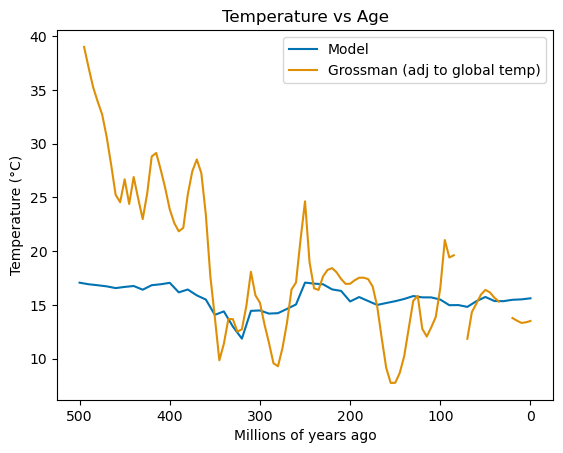

In [12]:
preindustrial_CO2 = 280  # ppm; preindustrial CO2
tropics_excess = 10  # C or K; tropics temp in excess of global temp

'''
Possible mismatch causes:
- using temps from tropics which are significantly hotter than rest of planet
-- would affect mismatch uniformly across time interval

- not accounting for radiative forcing of water
-- increasing radiative forcing would result in warmer model temps

- not accounting for supra-logarithmic behavior of CO2 forcing effect
-- especially important for 500-350 Ma and 250-200 Ma, periods where model does especially poorly

- 
'''

equil_temps = []
gh_eff = 33

print(gh_eff, sig)

for i in range(df_song.Age.size):  # Loop through all rows of df_song dataset
    age = df_song.Age.iloc[i]  # Age in millions of years from record i
    temp = df_song.Temperature.iloc[i]  # C; temp from record i
    co2 = df_song.CO2.iloc[i]  # ppm; CO2 from record i
    
    S = calc_S(age*1e6)  # W/m^2; solar flux at current age (*10^6 to get from Ma to years)
    A = calc_A(temp + 273)  # Albedo using temp (adding 273 as input is Kelvin but temp is in C)
    R = calc_R(co2, preindustrial_CO2)  # W/m^2; radiative forcing given CO2 concentration
    
    equil_temp = calc_T_equil(S, R, A, 33)  # C; Equilibrium temperature given calculated S, R, A, and GH_eff = 33
    
    equil_temps.append(equil_temp)  # Add equil temp to lsit of equil temps
    # print(age, round(S,3), round(A,3), round(R,3), round(equil_temp,3))
    
plt.title("Temperature vs Age")
plt.xlabel("Millions of years ago")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

plt.plot(df_song.Age, equil_temps, label="Model")
plt.plot(df_gross.Age, df_gross.Temperature-tropics_excess, label="Grossman (adj to global temp)")  # Subtracting tropics excess from gorssman temp to get world avg temp
plt.legend()

plt.gca().invert_xaxis()

**Are curves similar and if they're not (hint), why not? Comment on model vs. data. What is causing mismatch?**


The overall trends seem similar, but it seems like our model behaves similar to a moving average. Before we accounted for the difference between the tropical temperatures and global averages, our model temperatures were quite a bit lower than the real data.

After accounting for the tropical effects, we notice that the real data is much more volatile and reactive that the model. This suggests that there are positive feedback loops we haven't taken into account, especially ones that involve greenhouse gases other than CO$_2$. 

**Put your model data, Grossman T, Song T, and Scotese T on same plot. Comment on the differences between the plots.**

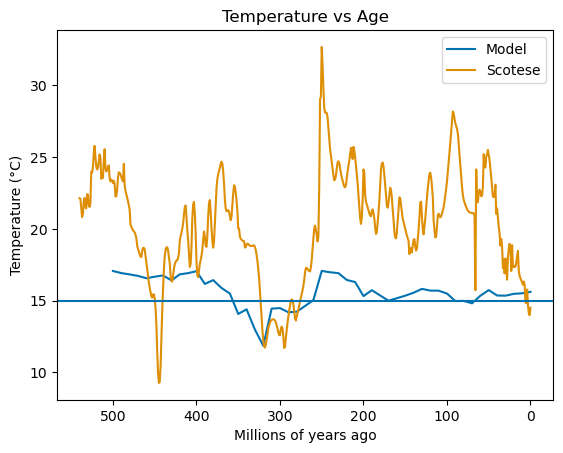

In [15]:
plt.title("Temperature vs Age")
plt.xlabel("Millions of years ago")
plt.ylabel("Temperature (\N{degree sign}C)")

'''
CHECK STYLE (CHANGE FROM COLOR TO LINESTYLE?)
'''

plt.plot(df_song.Age, equil_temps, label="Model")
# plt.plot(df_song.Age, df_song.Temperature-tropics_excess, label="Song")
# plt.plot(df_gross.Age, df_gross.Temperature-tropics_excess, label="Grossman")
plt.plot(df_scot.Age, df_scot.GAT, label="Scotese")
plt.axhline(y=15)

plt.legend()
plt.gca().invert_xaxis()

The Scotese dataset has a column for global average temperature, which suggests a more sophisticated methodology than the carbonate rock analyses of Song and Grossman. This may explain the close agreement of the Song and Grossman data, and the difference between these two and the Scotese data, especially before 350 Ma. The Scotese data seem more reasonable; as discussed in class, the >45$^\circ$C temperatures at around 500 Ma would have killed off most life. 

Going forward, we may want to use the Scotese data as a benchmark for our models.

**Scatter plots of CO2 vs. T for model and for data: Song CO2 data vs. our modeled temperatures; Song CO2 data vs Song Temperature.**

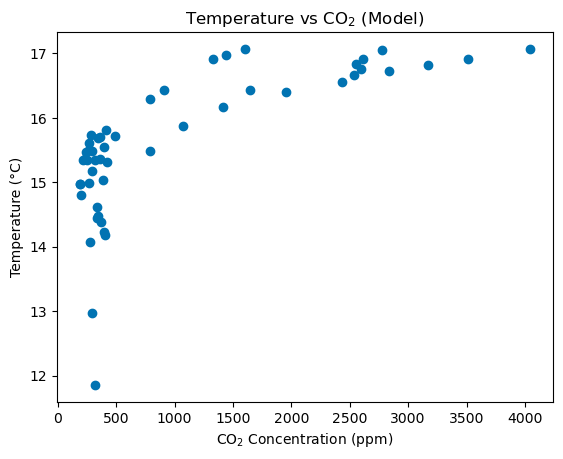

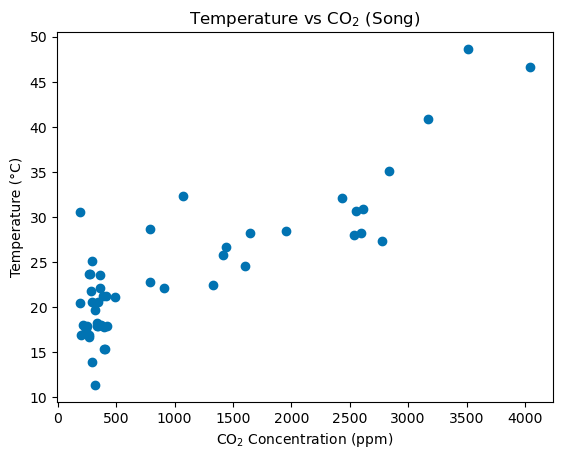

In [14]:
plt.title("Temperature vs CO$_2$ (Model)")
plt.xlabel("CO$_2$ Concentration (ppm)")
plt.ylabel("Temperature (\N{degree sign}C)")

plt.scatter(df_song.CO2, equil_temps, label="Model")
# plt.legend()

plt.show()

plt.title("Temperature vs CO$_2$ (Song)")
plt.xlabel("CO$_2$ Concentration (ppm)")
plt.ylabel("Temperature (\N{degree sign}C)")

plt.scatter(df_song.CO2, df_song.Temperature, label="Song")
# plt.legend()

**How do CO2 and T relate in our model? Explain. How do CO2 and T relate based on the proxy data? Explain.**

For both the model and data, CO$_2$ and temperature are positively correlated. The relationship is logarithmic in our model (as given by the formula from the IPCC), but this behavior is not shared by the proxy Song data. At concentrations above about 800ppm, the relationship in the Song data seems more linear, appearing somewhat exponential at concentrations above 2500ppm. This non-logarithmic relationship at high concentrations somewhat matches the analysis from Zhong and Haigh (2013). 

**You want to study the effect of CO2 on climate. Which time periods would you be interested in exploring, and why?**

We would want to study periods of sharp increases in temperature and perhaps CO$_2$. A cursory glance at the graphs suggest that sharp increases in temperature occured about about 300 Ma and 100 Ma. These events may mirror to some degree the effects of burning all of our organic carbon reserves in a very short period of time. By studying these periods, we may gain a better understanding of feedbacks in the climate system and help improve future modelling.